# 00. Домашнняя работа. Работа с датасетом

Импортирование полезных библиотек

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 0.Описание задачи

Рассматриваемый датасет **Car Insurance Data** содержит 10 тыс строк и 19 признаков:

1. `ID` (NF) - Уникальный идентификатор клиента, любое натуральное число
2. `AGE` (CF) - Возрастная группа, 4 возможных значения: 16-25, 26-39, 40-64, 65+
3. `GENDER` (CF) - Пол, 2 возможных значения: female (женский), male (мужской)
4. `RACE` (CF) - Рассовая особенность, 2 возможных значения: majority (большинство), minority (меньшинство)
5. `DRIVING_EXPERIENCE` (CF) - Стаж вождения, 4 возможных значения: 0-9y, 10-19y, 20-29y, 30y+
6. `EDUCATION` (CF) - Образование, 3 возможных значения: none (остутствует), high school (среднее образование), university (университетское/высшее образование)
7. `INCOME` (CF) - Социальный класс, определяющийся в зависимости от дохода, 4 возможных значения: poverty ($18.000 - $23.050 annually), working class ($23.050 - $32.500 annually), middle class ($32.000 - $60.000 annually), upper class ($100.000 annually). Ref: <https://business.onehowto.com/article/what-income-class-am-i-11065.html>, as of 2017
8. `CREDIT_SCORE` (NF) - Кредитный рейтинг, любое действительное число от 0 до 1
9. `VEHICLE_OWNERSHIP` (BF) - Является владельцем автомобиля, 2 возможных значения: 0 - не владеет, 1 - владеет
10. `VEHICLE_YEAR` (CF) - Год выпуска автомобиля, 2 возможных значения: before 2015, after 2015
11. `MARRIED` (BF) - Состояние в браке на данный момент, 2 возможных значения: 0 - не состоит, 1 - состоит
12. `CHILDREN` (BF) - Наличие несовершеннолетних детей, 2 возможных значения: 0 - нет, 1 - есть
13. `POSTAL_CODE` (NF) - Почтовый индекс, любое натуральное число
14. `ANNUAL_MILEAGE` (NF) - Годовой пробег, любое натуральное число кратное тысячи. Значения указаны в милях
15. `VEHICLE_TYPE` (CF) - Тип транспортного средства, 2 возможных значения: sedan, sports car
16. `SPEEDING_VIOLATIONS` (NF) - Количество случаев превышения скорости, любое целое неотрицательное число
17. `DUIS` (NF) - Driving Under the Influence / Количество случаев вождения в состоянии алкогольного опъянения, любое целое неотрицательное число
18. `PAST_ACCIDENTS` (NF) - Количество аварий в прошлом, любое целое неотрицательное число
19. `OUTCOME` (BF) - Аппеляция клиента о выплате в связи со страховым случаем, 2 возможных значения: 0 - страховой случай не произошел или клиент не подал аппеляцию, 1 - произошел страховой случай и клиент подал аппеляцию

NF - Numerical Features
CF - Categorical Features
BF - Binary Features

## 1. Чтение данных

In [2]:
data = pd.read_csv("./Car_Insurance_Claim.csv", sep=",", engine="python")

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
data.shape

(10000, 19)

In [5]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=10000, step=1)

In [7]:
data.at[2, "GENDER"]

'female'

In [8]:
data[["EDUCATION", "CHILDREN"]].head()

,EDUCATION,CHILDREN
0,high school,1.0
1,none,0.0
2,high school,0.0
3,university,1.0
4,none,0.0


## 2. Визуализация данных

In [9]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [10]:
data["CREDIT_SCORE"].mean()

0.515812809602791

Некоторые интересные наблюдения по таблице

- Среднее значение кредитного рейтинга довольно низкое по сравнению со средними значениями по штатам. Такое значение (0.515) можно отнести к типу Very Poor. Ref: https://www.investopedia.com/average-credit-scores-by-state-5105100, as of 2022.
- В среднем люди находятся в браке в 50% случаев, но имеют детей в 70% случаев

In [11]:
# sns.pairplot(data, hue="OUTCOME", diag_kind="hist")

In [12]:
data.corr()

C:\Users\Olyni\AppData\Local\Temp\ipykernel_20668\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


- Величина строховых случаев коррелирует только с годовым пробегом.

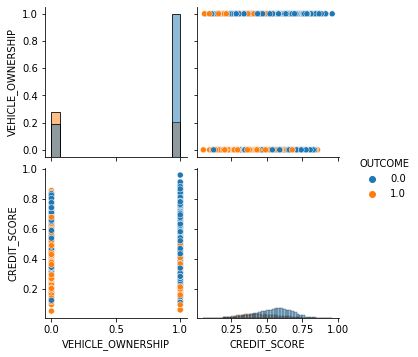

In [13]:
sns.pairplot(data[["VEHICLE_OWNERSHIP", "CREDIT_SCORE", "OUTCOME"]], hue="OUTCOME", diag_kind="hist")

## 3. Рассмотрение пропущенных значений

In [14]:
data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Пропущенные значения имеются в таких признаках, как `CREDIT_SCORE` и `ANNUAL_MILEAGE`. Пропущенные значения состовляют существенную часть (10%) от общего числа, поэтому просто удалить соотвествующие им строки не разумно. Так же не разумно удалить эти признаки совсем, в том числе потому что в них заложена полезная информация, которая может пригодиться для классификации.

Это числовые признаки, поэтому их значения стоит заполнить либо средними, либо медианными. Для `CREDIT_SCORE` и `ANNUAL_MILEAGE` средние и медианные значения не сильно отличаются, но для `ANNUAL_MILEAGE` заполнять средними значениями будет не совсем хорошо, так как у таких данных потеряется кратность 1000, поэтому выберем второй способ.

In [15]:
data.fillna(data.median(axis=0), axis=0, inplace=True)

C:\Users\Olyni\AppData\Local\Temp\ipykernel_20668\2639340319.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis=0), axis=0, inplace=True)


In [16]:
data.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [17]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.516718,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.130781,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## 4. Рассмотрение категориальных признаков

In [18]:
data.describe(include=["object"])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Закодируем бинарные (unique = 2) категориальные признаки значениями 0 и 1

In [19]:
print("Unique values of GENDER are " + " and ".join(map(str, data["GENDER"].unique())))

Unique values of GENDER are female and male


In [20]:
data["GENDER"] = pd.factorize(data["GENDER"])[0]
data["GENDER"].describe()

count    10000.000000
mean         0.499000
std          0.500024
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: GENDER, dtype: float64

In [21]:
print("Unique values of RACE are " + " and ".join(map(str, data["RACE"].unique())))
print("Unique values of VEHICLE_YEAR are " + " and ".join(map(str, data["VEHICLE_YEAR"].unique())))
print("Unique values of VEHICLE_TYPE are " + " and ".join(map(str, data["VEHICLE_TYPE"].unique())))

Unique values of RACE are majority and minority
Unique values of VEHICLE_YEAR are after 2015 and before 2015
Unique values of VEHICLE_TYPE are sedan and sports car


In [22]:
data["RACE"] = pd.factorize(data["RACE"])[0]
data["VEHICLE_YEAR"] = pd.factorize(data["VEHICLE_YEAR"])[0]
data["VEHICLE_TYPE"] = pd.factorize(data["VEHICLE_TYPE"])[0]
data[["RACE", "VEHICLE_YEAR", "VEHICLE_TYPE"]].describe()

,RACE,VEHICLE_YEAR,VEHICLE_TYPE
count,10000.000000,10000.000000,10000.000000
mean,0.098800,0.696700,0.047700
std,0.298408,0.459707,0.213141
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


Итак, новая интерпретация бинарных признаков:

1. `GENDER`:
   + 0 - female
   + 1 - male
2. `RACE`:
   + 0 - majority
   + 1 - minority
3. `VEHICLE_YEAR`:
   + 0 - after 2015
   + 1 - before 2015
4. `VEHICLE_TYPE`:
   + 0 - sedan
   + 1 - sports car

Небинарные (unique > 2) категориальные признаки векторизуем путем увеличения количества столбцов.

In [23]:
print("Unique values of AGE are " + ", ".join(map(str, data["AGE"].unique())))
print("Unique values of DRIVING_EXPERIENCE are " + ", ".join(map(str, data["DRIVING_EXPERIENCE"].unique())))
print("Unique values of EDUCATION are " + ", ".join(map(str, data["EDUCATION"].unique())))
print("Unique values of INCOME are " + ", ".join(map(str, data["INCOME"].unique())))

Unique values of AGE are 65+, 16-25, 26-39, 40-64
Unique values of DRIVING_EXPERIENCE are 0-9y, 10-19y, 20-29y, 30y+
Unique values of EDUCATION are high school, none, university
Unique values of INCOME are upper class, poverty, working class, middle class


Далее, например признак `AGE` заменяется 4-мя новыми бинарными признаками: `AGE_16-25`, `AGE_26-39`, `AGE_40-64`,  `AGE_65+`
С учетом удаления лишних столбцов, столбцов в таблице станет 19 + 11 = 30

In [24]:
data_nonbinary = pd.get_dummies(data[["AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"]])
data_nonbinary.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


In [25]:
data = pd.concat((data, data_nonbinary), axis=1)
data = data.drop(["AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"], axis=1)
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


## 5. Нормализация

Выполним стантартизацию количественных признаков

In [26]:
columns_for_stand = ["ID", "CREDIT_SCORE", "POSTAL_CODE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS" , "DUIS", "PAST_ACCIDENTS"]
data[columns_for_stand] = (data[columns_for_stand] - data[columns_for_stand].mean(axis=0))/data[columns_for_stand].std(axis=0)
data.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,...,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.278977e-17,0.499000,0.098800,-2.799538e-16,0.697000,0.696700,0.498200,0.688800,1.350031e-17,1.243450e-17,...,0.3299,0.211900,0.105200,0.415700,0.191500,0.392800,0.213800,0.181400,0.433600,0.171200
std,1.000000e+00,0.500024,0.298408,1.000000e+00,0.459578,0.459707,0.500022,0.463008,1.000000e+00,1.000000e+00,...,0.4702,0.408675,0.306826,0.492867,0.393501,0.488397,0.410008,0.385369,0.495596,0.376702
min,-1.725406e+00,0.000000,0.000000,-3.543027e+00,0.000000,0.000000,0.000000,0.000000,-5.089208e-01,-3.626872e+00,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.650234e-01,0.000000,0.000000,-6.515381e-01,0.000000,0.000000,0.000000,0.000000,-5.089208e-01,-6.436337e-01,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.327448e-03,0.000000,0.000000,6.357612e-02,1.000000,1.000000,0.000000,1.000000,-5.089208e-01,1.021759e-01,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.738817e-01,1.000000,0.000000,6.949655e-01,1.000000,1.000000,1.000000,1.000000,6.820002e-01,4.750808e-01,...,1.0000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.722073e+00,1.000000,1.000000,3.395757e+00,1.000000,1.000000,1.000000,1.000000,3.818880e+00,3.831224e+00,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Разбиение данных на обучающую и тестовую выборки

In [27]:
X = data.drop("OUTCOME", axis=1)
y = data["OUTCOME"]
X.shape, y.shape

((10000, 29), (10000,))

In [28]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 29), (3000, 29), (7000,), (3000,))

## 7. Метод k-ближайших соседей

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [31]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.16314285714285715

In [32]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.18500000000000005

In [33]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.18599999999999994, 17)

In [34]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.18566666666666665

In [35]:
kNN_f = KNeighborsClassifier()
min_err_test = 1
best_neighbours = 1
for i in range(1, 50):
    kNN_f.n_neighbors = i
    kNN_f.fit(X_train, y_train)
    err_test = 1 - kNN_f.score(X_test, y_test)
    if err_test < min_err_test:
        min_err_test = err_test
        best_neighbours = i
min_err_test, best_neighbours

(0.17900000000000005, 42)

## 8. Анализ ошибок на обучающей и тестовых выборках

In [36]:
from sklearn.metrics import confusion_matrix
y_train_prediction = kNN.predict(X_train)
confusion_matrix(y_train, y_train_prediction)

array([[4308,  496],
       [ 669, 1527]], dtype=int64)

In [37]:
y_train_prediction = kNN.predict(X_train)
confusion_matrix(y_test, y_test_prediction)

array([[1871,  192],
       [ 363,  574]], dtype=int64)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_prediction)
MSE_test  = mean_squared_error(y_test,  y_test_prediction)
R2_train = r2_score(y_train, y_train_prediction)
R2_test  = r2_score(y_test,  y_test_prediction)

MSE_train, MSE_test, R2_train, R2_test

(0.16642857142857143, 0.185, 0.2269837369890605, 0.13865840744406066)

In [39]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(0.4079565803226753, 0.4301162633521313)

Исходя из результатов можно сказать, что определять людей класса 0 (не попадут под страховой случай) получается в разы лучше, чем альтернативных класса 1 (попадут под страховой случай). Это обусловлено преобладанием 0-го класса в исходных данных. Тем не менее ошибка довольно большая, и много людей по ошибке относятся к классу 0, что приведет к потере немалого количества денег на страховых выплатах. Но с учетом того, что до анализа данных мы и так бы им выдали страховку: резальтат кажется не таким плачевным, ведь часть 1-го класса отсеяно. Однако, также какое-то количество людей, не сильно меньше, чем к 0-ому, было по ошибке отнесено к классу 1, что просто сократит прибыль, а это просто недопустимо в бизнесе!

Что касается алгоритма, то в целом он показал себя не совсем плохо, наверняка результат лучше простого угадывания.

## 9. Запуск других классификаторов

### Машина опорных векторов

In [40]:
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [41]:
y_train_pred_svc = model.predict(X_train)
y_test_pred_svc = model.predict(X_test)
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

(0.1517142857142857, 0.15533333333333332)

### Random Forest / Случайный лес

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

y_train_pred_svc = rf.predict(X_train)
y_test_pred_svc = rf.predict(X_test)
1 - rf.score(X_train, y_train), 1 - rf.score(X_test, y_test)

(0.0, 0.16766666666666663)

In [43]:
depth = np.arange(1, 30)
test_err = []
train_err = []
for dep in depth:
    rand_forest_model = RandomForestClassifier(max_depth = dep)
    rand_forest_model.fit(X_train, y_train)

    y_train_pred = rand_forest_model.predict(X_train)
    y_test_pred = rand_forest_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

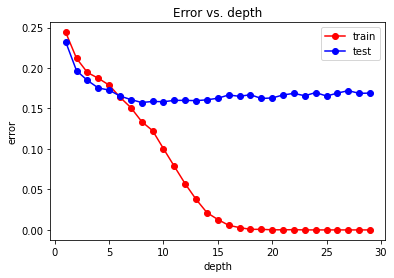

In [57]:
hidden_layer = np.arange(1, 30)
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()
plt.show()

In [58]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_train_err, min_test_err

(0.0, 0.15733333333333333)

In [60]:
dep_opt = depth[test_err == min_test_err]
print(dep_opt)

[8]


### Extremely Randomized Trees

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
ert = ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

y_train_pred_ext = ert.predict(X_train)
y_test_pred_ext = ert.predict(X_test)
1 - ert.score(X_train, y_train), 1 - ert.score(X_test, y_test)

(0.0, 0.17566666666666664)

### AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)

y_train_pred_ada = ada.predict(X_train)
y_test_pred_ada = ada.predict(X_test)
1 - ada.score(X_train, y_train), 1 - ada.score(X_test, y_test)

(0.139, 0.16033333333333333)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 1000).fit(X_train, y_train)

y_train_pred_agbt = gbt.predict(X_train)
y_test_pred_gbt = gbt.predict(X_test)
1 - gbt.score(X_train, y_train), 1 - gbt.score(X_test, y_test)

(0.06128571428571428, 0.15466666666666662)

## 10. Борьба с несбалансированностью классов

In [68]:
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,0.237899,0,0,0.858757,1.0,0,0.0,1.0,-0.508921,0.102176,...,0,0,0,1,0,0,0,0,1,0
1,0.861437,1,0,-1.215475,0.0,1,0.0,0.0,-0.508921,1.593795,...,0,0,0,0,1,0,0,1,0,0
2,-1.036514,0,0,-0.180243,1.0,1,0.0,0.0,-0.508921,-0.270729,...,0,0,0,1,0,0,0,0,0,1
3,-0.074668,1,0,-2.375768,1.0,1,0.0,1.0,0.682000,-0.270729,...,0,0,0,0,0,1,0,0,0,1
4,0.796957,1,0,-0.981429,1.0,1,0.0,0.0,0.682000,0.102176,...,1,0,0,0,1,0,0,0,0,1


<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

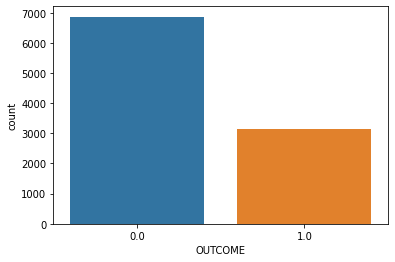

In [69]:
sns.countplot(data, x="OUTCOME")

In [84]:
class_0 = int((data[data["OUTCOME"] == 0])["OUTCOME"].value_counts())
class_1 = int((data[data["OUTCOME"] == 1])["OUTCOME"].value_counts())
class_0 - class_1

3734

In [86]:
data_balanced = data.copy()
data_balanced = data_balanced.drop(data_balanced.loc[data_balanced["OUTCOME"] == 0].sample(n=class_0 - class_1).index)
data_balanced["OUTCOME"].value_counts()

1.0    3133
0.0    3133
Name: OUTCOME, dtype: int64

### Метод k ближайших соседей

In [89]:
X = data_balanced.drop("OUTCOME", axis=1)
y = data_balanced["OUTCOME"]
X = X.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4386, 29), (1880, 29), (4386,), (1880,))

In [90]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [91]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.17897856817145463

In [92]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.21968085106382984

In [93]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.1937872499765969, 36)

In [94]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.2085106382978723

In [95]:
kNN_f = KNeighborsClassifier()
min_err_test = 1
best_neighbours = 1
for i in range(1, 50):
    kNN_f.n_neighbors = i
    kNN_f.fit(X_train, y_train)
    err_test = 1 - kNN_f.score(X_test, y_test)
    if err_test < min_err_test:
        min_err_test = err_test
        best_neighbours = i
min_err_test, best_neighbours

(0.2021276595744681, 13)

In [100]:
y_test_prediction = kNN.predict(X_test)
confusion_matrix(y_test, y_test_prediction)

array([[713, 195],
       [197, 775]], dtype=int64)

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


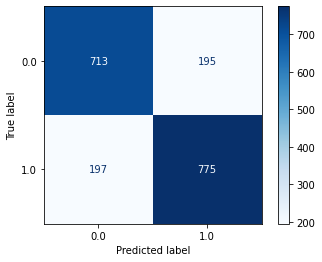

In [98]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kNN, X_test, y_test, cmap=plt.cm.Blues)

**Вывод**: 

## 11. Исключение коррелированных переменных

In [106]:
X = data.drop(["OUTCOME", "VEHICLE_OWNERSHIP", "SPEEDING_VIOLATIONS"], axis=1)
y = data["OUTCOME"]
X.shape

(10000, 27)

In [109]:
X = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 27), (3000, 27), (7000,), (3000,))

In [110]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [111]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.17600000000000005

In [112]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.18966666666666665

In [113]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.1945714285714285, 35)

In [114]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.18733333333333335

In [115]:
kNN_f = KNeighborsClassifier()
min_err_test = 1
best_neighbours = 1
for i in range(1, 50):
    kNN_f.n_neighbors = i
    kNN_f.fit(X_train, y_train)
    err_test = 1 - kNN_f.score(X_test, y_test)
    if err_test < min_err_test:
        min_err_test = err_test
        best_neighbours = i
min_err_test, best_neighbours

(0.18633333333333335, 36)

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(3000, 27)

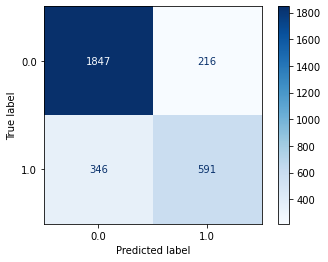

In [118]:
y_test_prediction = kNN.predict(X_test)
confusion_matrix(y_test, y_test_prediction)
plot_confusion_matrix(kNN, X_test, y_test, cmap=plt.cm.Blues)

Вывод: 